In [1]:
from Lab6 import *
data = Data('data/')
materials = ['1045','2024','HDPE','PMMA']
temps = ['0C','RT','BW']

In [65]:
spec_files = []
prop_files = []
for file in glob.glob('data/*Spec*'):
    spec_files.append(file)
for file in glob.glob('data/*'):
    if file not in spec_files:
        prop_files.append(file)
prop_files.sort()
spec_files.sort()
abp,abspec = prop_files[:12],spec_files[:12]
cdp,cdspec =prop_files[12:],spec_files[12:]
AB= {'BW':{},'RT':{},'0C':{}}
CD = {'BW':{},'RT':{},'0C':{}}
for prop,spec in zip(abp,abspec):
    speci,data,units = read_propfile(prop)
    datatables, _ = read_datafile(spec)
    which = ['BW','RT','0C']
    for pat in which:
        if pat in speci:
            mat = speci.split(pat)[0][:4]
            AB[pat][mat] = data
            AB[pat][mat].update(datatables['Data'])


for prop,spec in zip(cdp,cdspec):
    speci,data,units = read_propfile(prop)
    datatables, _ = read_datafile(spec)
    which = ['BW','RT','0C']
    if prop == 'data/N02-CD-HDPE-BW.csv':
        speci = 'HDPE BW'
    for pat in which:
        if pat in speci and speci != 'PMMA-100C':
            mat = speci.split(pat)[0][:4]
            CD[pat][mat] = data
            CD[pat][mat].update(datatables['Data'])
    if '100C' in speci:
        mat = 'PMMA'
        CD['BW']['PMMA'] = data
        CD['BW']['PMMA'].update(datatables['Data'])

units

[('Impact Height (Nominal)', 'mm'),
 ('Total Mass', 'kg'),
 ('Width', 'mm'),
 ('Thickness', 'mm'),
 ('Start Velocity', 'm/s'),
 ('Start Time', 'ms'),
 ('Total Time', 'ms'),
 ('Peak Force', 'N'),
 ('Total Energy', 'J')]

## Deliverable 1

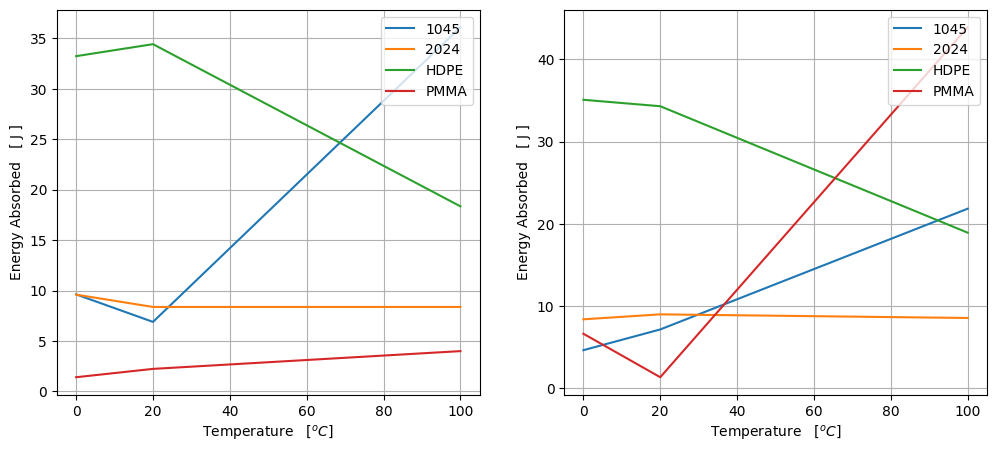

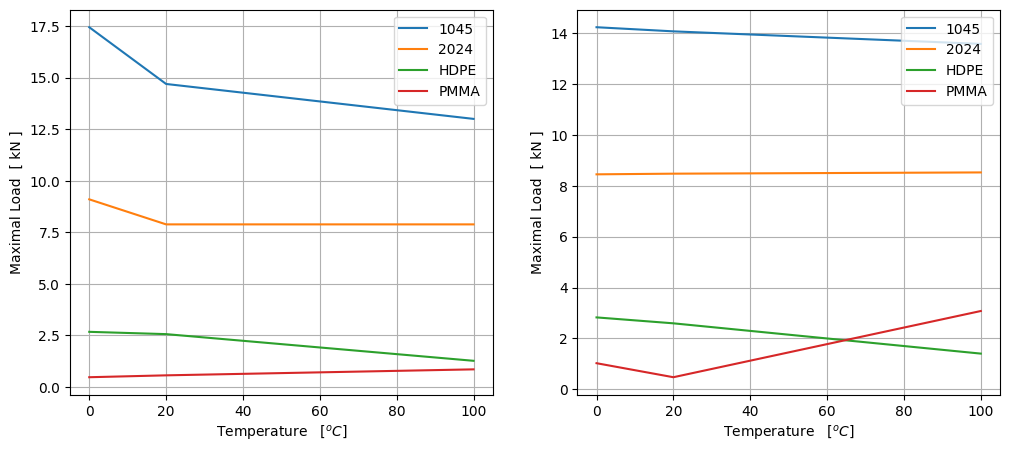

In [177]:
temps = ['0C','RT','BW']
mats = ['1045','2024','HDPE','PMMA']
plot_temps = [0,20,100]

fig,ax = plt.subplot_mosaic([['AB','CD']],figsize = (12,5))
for mat in mats:
    AB_energy = []
    CD_energy = []
    for temp in temps:
        try:
            val = float(AB[temp][mat]['Total Energy'])
        except KeyError:
            pass
        AB_energy.append(val)
        CD_energy.append(float(CD[temp][mat]['Total Energy']))
    ax['AB'].plot(plot_temps,AB_energy,label = f'{mat}')
    ax['CD'].plot(plot_temps,CD_energy,label = f'{mat}')
for plot in ax.keys():
    ax[plot].legend(loc = 'upper right')
    ax[plot].grid(visible=True)
    ax[plot].set_xlabel('Temperature   [$^oC$]')
    ax[plot].set_ylabel('Energy Absorbed   [ J ]')

fig.savefig('plots/q1_energy.png',dpi=600)

fig,ax = plt.subplot_mosaic([['AB','CD']],figsize = (12,5))
for mat in mats:
    AB_energy = []
    CD_energy = []
    for temp in temps:
        try:
            val = float(AB[temp][mat]['Peak Force'])/1e3
        except KeyError:
            pass
        AB_energy.append(val)
        CD_energy.append(float(CD[temp][mat]['Peak Force'])/1e3)
    ax['AB'].plot(plot_temps,AB_energy,label = f'{mat}')
    ax['CD'].plot(plot_temps,CD_energy,label = f'{mat}')
for plot in ax.keys():
    ax[plot].legend(loc = 'upper right')
    ax[plot].grid(visible=True)
    ax[plot].set_xlabel('Temperature   [$^oC$]')
    ax[plot].set_ylabel('Maximal Load  [ kN ]')

fig.savefig('plots/q1_load.png',dpi=600)

## Deliverable 2

In [191]:
#energy absorbed, maximum load, time to failure
print('Specimen & Energy Absorbed & Maximum Load & Time to Failure \\\\')
print('Groups A and B \\\\')
for mat in mats:
    for temp in temps:
        try:
            ener = AB[temp][mat]['Total Energy']
            load = AB[temp][mat]['Peak Force']
            dt = float(AB[temp][mat]['Total Time']) - float(AB[temp][mat]['Start Time'])
            print(f'{mat} at {temp} & {ener} & {load} & {dt} \\\\ \n\hline')
        except KeyError:
            pass
print('Groups B and C \\\\\n\hline')
for mat in mats:
    for temp in temps:
        try:
            ener = CD[temp][mat]['Total Energy']
            load = CD[temp][mat]['Peak Force']
            dt = float(CD[temp][mat]['Total Time']) - float(CD[temp][mat]['Start Time'])
            print(f'{mat} at {temp} & {ener} & {load} & {dt} \\\\ \n\hline')
        except KeyError:
            pass

Specimen & Energy Absorbed & Maximum Load & Time to Failure \\
Groups A and B \\
1045 at 0C & 9.619 & 17441.723 & 1.026 \\ 
\hline
1045 at RT & 6.892 & 14690.818 & 0.458 \\ 
\hline
1045 at BW & 36.104 & 12997.954 & 2.064 \\ 
\hline
2024 at 0C & 9.594 & 9097.932 & 0.8500000000000001 \\ 
\hline
2024 at RT & 8.373 & 7883.913 & 0.852 \\ 
\hline
HDPE at 0C & 33.236 & 2674.698 & 6.859999999999999 \\ 
\hline
HDPE at RT & 34.424 & 2563.510 & 7.359999999999999 \\ 
\hline
HDPE at BW & 18.346 & 1270.430 & 7.699999999999999 \\ 
\hline
PMMA at 0C & 1.407 & 474.392 & 6.76 \\ 
\hline
PMMA at RT & 2.233 & 565.541 & 7.0 \\ 
\hline
PMMA at BW & 3.995 & 855.563 & 8.04 \\ 
\hline
Groups B and C \\
\hline
1045 at 0C & 4.627 & 14229.919 & 0.178 \\ 
\hline
1045 at RT & 7.149 & 14067.589 & 0.2360000000000002 \\ 
\hline
1045 at BW & 21.841 & 13574.803 & 1.062 \\ 
\hline
2024 at 0C & 8.383 & 8449.110 & 0.856 \\ 
\hline
2024 at RT & 8.985 & 8475.063 & 0.882 \\ 
\hline
2024 at BW & 8.543 & 8524.085 & 0.86 \\ 
\hl

## Deliverable 4

2024: Pq = 22.836, Pmax = 24.479531
7075: Pq 19.376385, Pmax = 19.376385


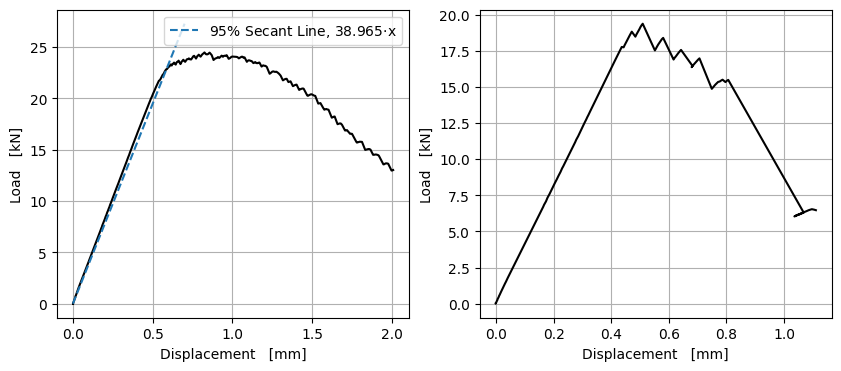

In [192]:
_7075 = pd.read_csv('data/7075.txt',sep='\t',header=1)
_2024 = pd.read_csv('data/2024.txt',sep='\t',header=1)
D = {'2024':{'disp':np.array(_2024['CTOD mm']), 'load':np.array(_2024['LOAD kn'])},   
     '7075':{'disp':np.array(_7075['CTOD mm']), 'load':np.array(_7075['LOAD kn'])}}

plot_keys = [key for key in D.keys()]
fig, ax  = plt.subplot_mosaic([plot_keys],figsize = (10,4))

for mat in plot_keys:
    x,y = D[mat]['disp'],D[mat]['load']
    ax[mat].plot(x,y,color ='k')
    if mat == '2024':
        m = sp.stats.linregress(x[150:250],y[150:250]).slope
        _x = np.linspace(0,.7,1000)
        ax[mat].plot(_x,_x*m*.95,'--',label = f'95% Secant Line: {np.around(m*.95,3)}$\cdot$x')
        ax[mat].legend(loc='upper right')
        pq2024 = 22.836
        print(f'2024: Pq = {pq2024}, Pmax = {max(y)}')
    if mat == '7075':
        pq7075 = np.max(y)
        print(f'7075: Pq {pq7075}, Pmax = {pq7075}')
    ax[mat].grid(visible=True)
    ax[mat].set_xlabel('Displacement   [mm]')
    ax[mat].set_ylabel('Load   [kN]')

fig.savefig('plots/q4.png',dpi=600)



In [168]:
zav2024 = np.average([26.66,26.43,26.93,27.47,26.69,27.22])*1e-3
zav7075 = np.average([26.52,25.98,26.92,27.78,26.07,27.44])*1e-3
W2024,W7075 = 50.90*1e-3, 51.05*1e-3
t2024,t7075 = 25.39*1e-3, 25.27*1e-3
a2024,a7075 = W2024-zav2024, W7075-zav7075

faw = lambda aw: (2+aw)/ ((1-aw)**(3/2)) * (0.886+ 4.64*aw -13.32*aw**2+ 14.72*aw**3 -5.6*aw**4)

K1 = lambda p,t,a,w: p / t / np.sqrt(w) * faw(a/w) *1e-3


k12024 = K1(pq2024,t2024,a2024,W2024)
k17075 = K1(pq7075,t7075,a7075,W7075)
print(f'2024: {k12024}')


print(f'7075: {k17075}')

2024: 35.35838267669916
7075: 30.436760392337384


In [196]:
a7075 / W7075

np.float64(0.4753183153770813)